<a href="https://colab.research.google.com/github/nedimazar/SM-A3/blob/main/Bert_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_fscore_support, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


Importing Weights & Biases package for hyperparameters optimalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the training and test data

In [ ]:
olid_train = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/olid-train-small.csv")
hasoc_train = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/hasoc-train.csv")
olid_test = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/olid-test.csv")

# Custom metrics

In [ ]:
def nohate(labels, preds):
    return precision_recall_fscore_support(labels, preds,pos_label=0, average='binary')

def hate(labels, preds):
    return precision_recall_fscore_support(labels, preds,pos_label=1, average='binary')

def weight(labels, preds):
    return precision_recall_fscore_support(labels, preds, average='weighted')

def macro(labels, preds):
    return precision_recall_fscore_support(labels, preds, average='macro')


In [ ]:
def print_metrics_summary(result):
    print(f"For target class 0 (NOT) we have:\n precision: {round(result['NOT'][0], 2)} \n recall: {round(result['NOT'][1], 2)}\n F-beta: {round(result['NOT'][2], 2)}")
    print(f"For target class 1 (OFF) we have:\n precision: {round(result['OFF'][0], 2)} \n recall: {round(result['OFF'][1], 2)}\n F-beta: {round(result['OFF'][2], 2)}")
    print(f"For both classes we have weighted average of:\n precision: {round(result['weighted_avg'][0], 2)} \n recall: {round(result['weighted_avg'][1], 2)}\n F-beta: {round(result['weighted_avg'][2], 2)}")
    print(f"For both classes we have macro average of:\n precision: {round(result['macro_avg'][0], 2)} \n recall: {round(result['macro_avg'][1], 2)}\n F-beta: {round(result['macro_avg'][2], 2)}")

# Default hyperparameters Bert base cased

## OLID training

In [ ]:
model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.output_dir = "/content/drive/MyDrive/SubjectivityMining3/default_output/olid"
model_args.best_model_dir = "/content/drive/MyDrive/SubjectivityMining3/default_output/olid/best_model"

In [ ]:
# Create a TransformerModel
model = ClassificationModel("bert", "bert-base-cased", use_cuda=True, args=model_args)
model.train_model(olid_train)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

(732, 0.5413152428924061)

In [ ]:
predictions, raw_outputs = model.predict(olid_test.text.tolist())

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(olid_test,
                                                            NOT= nohate,
                                                            OFF= hate,
                                                            weighted_avg= weight,
                                                            macro_avg= macro)

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
print_metrics_summary(result)

For target class 0 (NOT) we have:
 precision: 0.89 
 recall: 0.86
 F-beta: 0.87
For target class 1 (OFF) we have:
 precision: 0.66 
 recall: 0.72
 F-beta: 0.69
For both classes we have weighted average of:
 precision: 0.83 
 recall: 0.82
 F-beta: 0.82
For both classes we have macro average of:
 precision: 0.78 
 recall: 0.79
 F-beta: 0.78


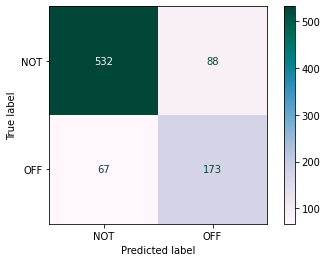

In [ ]:
# create confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true = olid_test.labels.values, y_pred = predictions, cmap='PuBuGn', display_labels=["NOT", "OFF"])
plt.savefig("/content/drive/MyDrive/SubjectivityMining3/default_output/olid/confmat_bert_olid.png", dpi=300)

plt.show()

## HASOC training

In [ ]:
model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.output_dir = "/content/drive/MyDrive/SubjectivityMining3/default_output/hasoc"
model_args.best_model_dir = "/content/drive/MyDrive/SubjectivityMining3/default_output/hasoc/best_model"

In [ ]:
# Create a TransformerModel
model = ClassificationModel("bert", "bert-base-cased", use_cuda=True, args=model_args)
model.train_model(hasoc_train)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

(732, 0.6353588885948306)

In [ ]:
predictions, raw_outputs = model.predict(olid_test.text.tolist())

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(olid_test,
                                                            NOT= nohate,
                                                            OFF= hate,
                                                            weighted_avg= weight,
                                                            macro_avg= macro)

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

In [ ]:
print_metrics_summary(result)

For target class 0 (NOT) we have:
 precision: 0.83 
 recall: 0.93
 F-beta: 0.88
For target class 1 (OFF) we have:
 precision: 0.74 
 recall: 0.5
 F-beta: 0.59
For both classes we have weighted average of:
 precision: 0.8 
 recall: 0.81
 F-beta: 0.8
For both classes we have macro average of:
 precision: 0.78 
 recall: 0.71
 F-beta: 0.73


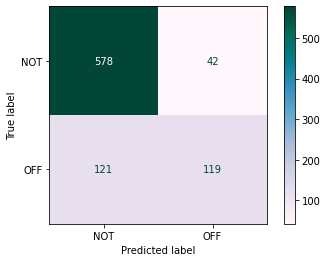

In [ ]:
# create confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true = olid_test.labels.values, y_pred = predictions, cmap='PuBuGn', display_labels=["NOT", "OFF"])
plt.savefig("/content/drive/MyDrive/SubjectivityMining3/default_output/hasoc/confmat_bert_hasoc.png", dpi=300)

plt.show()

# Playground with W&B package

In [ ]:
import logging
import wandb

wandb.login()

Splitting train for train and development sets

In [ ]:
olid_train_df, olid_dev_df = train_test_split(olid_train, test_size=0.3, random_state=42)

W&B Sweep


In [ ]:
sweep_config = {
    "method": "bayes",  # grid, random
    "metric": {"name": "f1_macro", "goal": "maximize"}, #the W&B optimizer will be aiming to maximize the macro average F1
    "parameters": {
        "num_train_epochs": {"min": 2, "max": 6},
        "learning_rate": {"min": 1e-6, "max": 1e-5}
        },
     "early_terminate": {"type": "hyperband", "min_iter": 6},
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="Bert-base-cased - Hyperparameter Optimization") #Project name for logging sweeps using W&B

Create sweep with ID: q5siznui
Sweep URL: https://wandb.ai/subjectivitymining/Bert-base-cased%20-%20Hyperparameter%20Optimization/sweeps/q5siznui


In [ ]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
model_args = ClassificationArgs()
model_args.eval_batch_size = 16
model_args.evaluate_during_training = True
model_args.save_eval_checkpoints = False
model_args.save_model_every_epoch = False
model_args.manual_seed = 4
model_args.max_seq_length = 256
model_args.overwrite_output_dir = True
model_args.train_batch_size = 32
model_args.output_dir = "/content/drive/MyDrive/SubjectivityMining3/model_outputs"
model_args.best_model_dir = "/content/drive/MyDrive/SubjectivityMining3/model_outputs/best_model"
model_args.logging_steps = 1
model_args.wandb_project = "Bert-base-cased - Hyperparameter Optimization"

In [ ]:
from sklearn.metrics import f1_score

def f1_macro(labels, preds):
  return f1_score(labels, preds, average = 'macro')

In [ ]:
def train():
    # Initialize a new wandb run
    wandb.init()

    # Create a TransformerModel
    model =  ClassificationModel(
        'bert', 
        'bert-base-cased', 
        use_cuda=True, 
        args=model_args,
        sweep_config=wandb.config)
    

    # Train the model
    model.train_model(train_df=olid_train_df, eval_df=olid_dev_df,
                      f1_macro= f1_macro,
                     )

    # Sync wandb
    wandb.join()


In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: 0lcbm5y2 with config:
wandb: 	learning_rate: 5.331871464907458e-06
wandb: 	num_train_epochs: 3


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,██▅▅▄▅▅▅▄▅▄▅▃▄▃▄▃▄▅▃▃▃▃▂▆▃▂▃▃▁▂▂▂▂▁▃▃▁▁▃
auprc,▁▇█
auroc,▁▆█
eval_loss,█▃▁
f1_macro,▁▆█
fn,█▃▁
fp,▁▄█
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▂▅▇███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁▇█
tn,█▅▁


wandb: Agent Starting Run: 1mepqw4r with config:
wandb: 	learning_rate: 7.291551272493797e-06
wandb: 	num_train_epochs: 2


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▅▄▃▆▄▅▄▄▅▅▃▄▅▃▃▄▂▂▃▃▃▂▂▄▃▅▃▃▃▁▂▂▃▁▅▂▂▁
auprc,▁█
auroc,▁█
eval_loss,█▁
f1_macro,▁█
fn,█▁
fp,▁█
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▂▃▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁█
tn,█▁


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jtbhtjs4 with config:
wandb: 	learning_rate: 5.823385159803926e-06
wandb: 	num_train_epochs: 5


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▆▆▅▄▅▄▄▄▃▄▄▃▄▄▃▃▂▃▃▅▃▁▃▃▄▅▂▅▅▅▂▁▄▃▃▅
auprc,▁▇███
auroc,▁▆███
eval_loss,█▃▁▁▂
f1_macro,▁▇█▇█
fn,█▅▁▃▂
fp,▁▂█▅▆
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁████
tn,█▇▁▄▃


wandb: Agent Starting Run: p7djjumo with config:
wandb: 	learning_rate: 5.4925174114147786e-06
wandb: 	num_train_epochs: 6


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▅▅▄▅▄▆▃▄▄▃▄▃▃▄▄▅▃▂▂▄▅▂▁▂▂▁▁▂▁▁▁▃▃▁▁▅
auprc,▁▇████
auroc,▁▆████
eval_loss,█▃▁▂▃▃
f1_macro,▁▆█▇██
fn,█▅▁▃▃▂
fp,▁▂█▅▄▆
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
mcc,▁▆▇▆█▇
tn,█▇▁▄▅▃


wandb: Agent Starting Run: w25u7gn8 with config:
wandb: 	learning_rate: 2.3627080039565778e-06
wandb: 	num_train_epochs: 6


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▆▅▆▄▄▅▅▄▆▃▅▅▂▅▄▄▄▄▅▄▂▃▄▄▂▁▂▃▂▁▂▂▁▁▃▂▁▂▄
auprc,▁▅▇███
auroc,▁▅▇███
eval_loss,█▅▃▂▁▁
f1_macro,▁▄▇███
fn,█▆▁▂▁▁
fp,▁▁█▅▅▆
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
mcc,▁▄▇███
tn,██▁▄▄▃


wandb: Agent Starting Run: 8sm1f08b with config:
wandb: 	learning_rate: 6.085622315329645e-06
wandb: 	num_train_epochs: 6


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,██▆▆▅▅▄▅▄▆▃▄▄▃▄▃▃▄▄▅▃▂▂▄▅▂▁▂▂▁▁▂▁▁▁▃▃▁▁▅
auprc,▁▇████
auroc,▁▆████
eval_loss,█▃▁▂▄▄
f1_macro,▁▆█▇█▇
fn,█▅▁▂▃▂
fp,▁▂█▆▄▇
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
mcc,▁▆█▆█▆
tn,█▇▁▃▅▂


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ezd3d17n with config:
wandb: 	learning_rate: 5.1770735686483535e-06
wandb: 	num_train_epochs: 6


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▅▅▄▅▄▆▃▄▄▃▄▃▃▄▄▅▃▂▂▄▅▂▁▂▂▁▁▂▁▁▁▃▃▁▁▅
auprc,▁▇████
auroc,▁▆████
eval_loss,█▂▁▁▃▂
f1_macro,▁▇█▇██
fn,█▄▁▃▃▂
fp,▁▃█▅▃▆
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
mcc,▁▇▇▇█▇
tn,█▆▁▄▆▃


wandb: Agent Starting Run: r7x1sf5c with config:
wandb: 	learning_rate: 5.57358234176918e-06
wandb: 	num_train_epochs: 6


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 0 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▅▅▄▅▄▆▃▄▄▃▄▃▃▄▄▅▃▂▂▄▅▂▁▂▂▁▁▂▁▁▁▃▃▁▁▅
auprc,▁▇████
auroc,▁▆████
eval_loss,█▃▁▂▃▃
f1_macro,▁▆▇▇█▇
fn,█▅▁▃▃▂
fp,▁▂█▅▃▆
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
mcc,▁▆▇▆█▇
tn,█▇▁▄▆▃


wandb: Agent Starting Run: k066vcwl with config:
wandb: 	learning_rate: 8.332211602631487e-06
wandb: 	num_train_epochs: 2


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▄▃▆▄▅▄▄▅▅▃▄▅▃▃▄▂▂▃▃▃▂▂▄▃▅▂▃▃▁▂▂▃▁▅▂▂▁
auprc,▁█
auroc,▁█
eval_loss,█▁
f1_macro,▁█
fn,█▁
fp,▁█
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▂▃▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁█
tn,█▁


wandb: Agent Starting Run: j5w476x3 with config:
wandb: 	learning_rate: 4.482370144461565e-06
wandb: 	num_train_epochs: 2


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▅▅▃▆▄▅▄▄▅▄▃▅▅▃▃▅▃▃▃▄▄▃▃▄▄▅▃▃▂▂▃▄▃▁▅▃▂▁
auprc,▁█
auroc,▁█
eval_loss,█▁
f1_macro,▁█
fn,█▁
fp,▁█
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▂▃▆▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁█
tn,█▁


wandb: Agent Starting Run: thdvajwx with config:
wandb: 	learning_rate: 8.732717298422804e-06
wandb: 	num_train_epochs: 4


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▆▆▅▅▄▃▄▅▄▆▃▃▄▄▃▃▃▆▅▃▂▁▃▄▂▅▂▁▂▂▃▄▄▂▁▁
auprc,▁██▇
auroc,▁▇██
eval_loss,█▂▁▃
f1_macro,▁▆██
fn,█▅▁▂
fp,▁▂█▆
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁███
tn,█▇▁▃


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6st4hxha with config:
wandb: 	learning_rate: 3.2575895928446395e-06
wandb: 	num_train_epochs: 4


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▅▅▅▆▄▅▄▄▆▅▄▆▄▃▄▄▄▃▃▅▄▃▄▃▄▄▃▅▃▁▂▃▄▄▄▃▂▁
auprc,▁▆██
auroc,▁▆██
eval_loss,█▄▁▁
f1_macro,▁▅██
fn,█▅▁▂
fp,▂▁█▅
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁▅▇█
tn,▇█▁▄


wandb: Agent Starting Run: jgkdfa7w with config:
wandb: 	learning_rate: 3.507116283253453e-06
wandb: 	num_train_epochs: 5


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▆▅▆▆▆▄▅▆▄▅▄▃▅▄▃▄▄▃▄▃▄▃▅▃▁▃▃▄▅▁▅▅▅▂▁▄▃▃▅
auprc,▁▆▇██
auroc,▁▆███
eval_loss,█▄▂▁▁
f1_macro,▁▆███
fn,█▅▁▂▂
fp,▁▂█▄▅
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁▆▇██
tn,█▇▁▅▄


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v24wwe52 with config:
wandb: 	learning_rate: 3.248930329786032e-06
wandb: 	num_train_epochs: 3


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,▇█▆▄▃▄▄▄▃▄▃▄▃▃▃▄▃▃▄▃▂▃▄▂▅▃▁▂▂▂▂▂▃▁▁▃▃▁▁▂
auprc,▁▇█
auroc,▁▇█
eval_loss,█▃▁
f1_macro,▁▆█
fn,█▅▁
fp,▂▁█
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▂▅▇███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁▆█
tn,▇█▁


wandb: Agent Starting Run: bwg91g8d with config:
wandb: 	learning_rate: 7.428280346861803e-06
wandb: 	num_train_epochs: 4


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▆▆▅▅▄▄▄▅▃▆▄▃▄▄▃▃▃▆▅▃▂▁▃▃▂▅▃▁▂▂▃▄▄▂▁▁
auprc,▁███
auroc,▁▆██
eval_loss,█▂▁▂
f1_macro,▁▆██
fn,█▅▁▂
fp,▁▂█▅
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁▇▇█
tn,█▇▁▄


wandb: Agent Starting Run: rnph0t2s with config:
wandb: 	learning_rate: 8.079483259358993e-06
wandb: 	num_train_epochs: 4


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▆▆▅▅▄▃▄▅▄▆▃▃▄▄▃▃▃▆▅▃▂▁▃▃▂▅▃▁▂▂▃▄▄▂▁▁
auprc,▁███
auroc,▁▇██
eval_loss,█▂▁▂
f1_macro,▁▆██
fn,█▅▁▂
fp,▁▃█▆
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁█▇█
tn,█▆▁▃


wandb: Agent Starting Run: i65ejd9l with config:
wandb: 	learning_rate: 8.306482122031303e-06
wandb: 	num_train_epochs: 4


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Training loss,█▇▆▆▆▆▅▅▄▃▄▅▄▆▃▃▄▄▃▃▃▆▅▃▂▁▃▃▂▅▃▁▂▂▃▄▄▂▁▁
auprc,▁██▇
auroc,▁▇██
eval_loss,█▂▁▂
f1_macro,▁▇██
fn,█▅▁▂
fp,▁▃█▆
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▆███▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
mcc,▁█▇▇
tn,█▆▁▃


wandb: Agent Starting Run: vvoudvef with config:
wandb: 	learning_rate: 8.912439851605348e-06
wandb: 	num_train_epochs: 4


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/4096 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/1756 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/128 [00:00<?, ?it/s]

During 30 total runs and 2h computing time we managed to find out the best hyperparameters when optimizing to maximize macroaveraged F1 score (highest 0.7605) are:
- learning_rate = 0.000008912
- num_train_epochs = 4

## Best model from Bayes hyperparameter optimization 

In [ ]:
model_args = ClassificationArgs()
model_args.learning_rate = 8.912e-6 #best learning late from bayes search using wandb
model_args.num_train_epochs = 4 #best number of training epochs using wandb sweeps
model_args.eval_batch_size = 16
model_args.evaluate_during_training = False # now False cuz we train on whole training dataset
model_args.save_eval_checkpoints = False
model_args.save_model_every_epoch = False
model_args.manual_seed = 4
model_args.max_seq_length = 256
model_args.overwrite_output_dir = True
model_args.train_batch_size = 32
model_args.output_dir = "/content/drive/MyDrive/SubjectivityMining3/model_outputs"
model_args.best_model_dir = "/content/drive/MyDrive/SubjectivityMining3/model_outputs/best_model"
model_args.logging_steps = 1



In [ ]:
model =  ClassificationModel(
    'bert', 
    'bert-base-cased', 
    use_cuda=True, 
    args=model_args,)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/olid-train-small.csv") #importing full training data again

In [ ]:
model.train_model(train_df=train,)

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/183 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/183 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/183 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/183 [00:00<?, ?it/s]

(732, 0.4382889063143339)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(olid_test,
                                                            NOT= nohate,
                                                            OFF= hate,
                                                            weighted_avg= weight,
                                                            macro_avg= macro
                                                            )

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/54 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.5676458448868258,
 'tp': 166,
 'tn': 544,
 'fp': 76,
 'fn': 74,
 'auroc': 0.8855913978494625,
 'auprc': 0.7569821064089342,
 'NOT': (0.8802588996763754, 0.8774193548387097, 0.8788368336025848, None),
 'OFF': (0.6859504132231405, 0.6916666666666667, 0.6887966804979254, None),
 'weighted_avg': (0.8260332755498913,
  0.8255813953488372,
  0.825802372271052,
  None),
 'macro_avg': (0.7831046564497579,
  0.7845430107526882,
  0.7838167570502551,
  None),
 'eval_loss': 0.3847011576096217}

In [ ]:
print(f"For target class 0 (NOT) we have:\n precision: {round(result['NOT'][0], 2)} \n recall: {round(result['NOT'][1], 2)}\n F-beta: {round(result['NOT'][2], 2)}")
print(f"For target class 1 (OFF) we have:\n precision: {round(result['OFF'][0], 2)} \n recall: {round(result['OFF'][1], 2)}\n F-beta: {round(result['OFF'][2], 2)}")
print(f"For both classes we have weighted average of:\n precision: {round(result['weighted_avg'][0], 2)} \n recall: {round(result['weighted_avg'][1], 2)}\n F-beta: {round(result['weighted_avg'][2], 2)}")
print(f"For both classes we have macro average of:\n precision: {round(result['macro_avg'][0], 2)} \n recall: {round(result['macro_avg'][1], 2)}\n F-beta: {round(result['macro_avg'][2], 2)}")

For target class 0 (NOT) we have:
 precision: 0.88 
 recall: 0.88
 F-beta: 0.88
For target class 1 (OFF) we have:
 precision: 0.69 
 recall: 0.69
 F-beta: 0.69
For both classes we have weighted average of:
 precision: 0.83 
 recall: 0.83
 F-beta: 0.83
For both classes we have macro average of:
 precision: 0.78 
 recall: 0.78
 F-beta: 0.78


Sanity check if the model was saved correctly (also a way to load the model from Google Drive)

In [ ]:
best_model = ClassificationModel('bert', "/content/drive/MyDrive/SubjectivityMining3/model_outputs/best_model")

In [ ]:
best_result, best_model_outputs, best_wrong_predictions = best_model.eval_model(olid_test,
                                                            NOT= nohate,
                                                            OFF= hate,
                                                            weighted_avg= weight,
                                                            macro_avg= macro
                                                            )

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/54 [00:00<?, ?it/s]

In [ ]:
result == best_result

True

In the end, W&B hyperparameter optimization turned out to be not succesfull, so we don't include these results in the report. Probably we need to widen the scope of hyperparameters, as well as values to search within.